In [1]:
from EntityNameRetriever import EntityNameRetriever
from graph import graph_from_edgelist, remove_void_types
import networkx as nx
from CorpusManager import CorpusManager
import pickle
from utils import save_data_with_pickle, load_data_with_pickle
import time

In [2]:
# List of classes used to test the correctness of the workflow
LIST_OF_CLASSES = ['City', 'Mosque', 'Animal']
# PATH in which utility files are stored
PICKLES_PATH = '../../source_files/pickles/'

# PATH that refers to the file which let the building of the Ontology Graph
PATH_TO_EDGELIST = PICKLES_PATH + 'dbpedia_edgelist_no_closure.tsv'
# PATH to the corpus from which information are extracted
CORPUS_PATH = '/datahdd/vmanuel/ELMo/Corpora/shuffled_text_with_words'

In [3]:
try:
    G = load_data_with_pickle(PICKLES_PATH + 'graph')
except:
    G = graph_from_edgelist(PATH_TO_EDGELIST)
    save_data_with_pickle(PICKLES_PATH + 'graph', G)

# Check if the built graph is a tree (it should be a tree because we need to use an Ontology Tree)
print("the input graph is a tree: {}".format(nx.is_tree(G)))

the input graph is a tree: True


In [4]:
list_of_classes = [n for n in G.nodes()]


In [5]:
entity_dict = load_data_with_pickle(PICKLES_PATH + 'entity_dict')

In [6]:
void_types = [t for t, v in entity_dict.items() if v == []]

pruned_G = remove_void_types(G, void_types)
print("the pruned graph is a tree: {}".format(nx.is_tree(pruned_G)))

the pruned graph is a tree: True


In [7]:
len(void_types)

36

In [20]:
c = CorpusManager()
c.read_corpus(CORPUS_PATH, length = 15000)
c.create_all_entities(entity_dict, concepts=list_of_classes)

read input corpus


100%|██████████| 15000/15000 [00:01<00:00, 9193.42it/s]


In [21]:
lengths = [len(w.split(' ')) for w in c.all_entities]

In [22]:
import matplotlib.pyplot as plt

<BarContainer object of 18 artists>

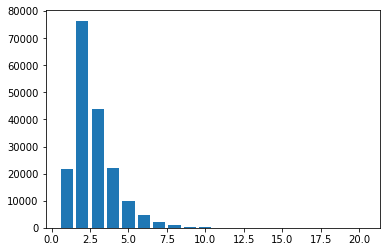

In [23]:
from collections import Counter
a = Counter(lengths)
plt.bar(a.keys(), a.values())

In [24]:
a

Counter({3: 44020,
         2: 76444,
         4: 21909,
         1: 21741,
         5: 10066,
         6: 4648,
         7: 1959,
         8: 884,
         9: 438,
         10: 207,
         11: 71,
         12: 48,
         16: 2,
         14: 10,
         15: 6,
         13: 3,
         18: 2,
         20: 1})